In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyt
import seaborn as sb
from sklearn.cluster import KMeans

In [ ]:
#load dataset for customer records

customer_df = pd.read_csv('customer_data_records.csv')
customer_df

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,117,20
1,2,107,59
2,3,29,36
3,4,121,19
4,5,86,90
...,...,...,...
169,170,111,76
170,171,138,87
171,172,84,15
172,173,107,92


In [15]:
customer_df.isnull().sum()

CustomerID                0
Annual Income (k$)        0
Spending Score (1-100)    0
Cluster                   0
dtype: int64

In [16]:
customer_df.duplicated().sum()

np.int64(0)

In [17]:
customer_df.shape

(174, 4)

In [18]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              174 non-null    int64
 1   Annual Income (k$)      174 non-null    int64
 2   Spending Score (1-100)  174 non-null    int64
 3   Cluster                 174 non-null    int32
dtypes: int32(1), int64(3)
memory usage: 4.9 KB


In [4]:
#select items for clustering

x = customer_df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [5]:
#apply the kmeans clustering
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(x)

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


In [6]:
#add cluster label 
customer_df['Cluster'] = kmeans.labels_
customer_df

,CustomerID,Annual Income (k$),Spending Score (1-100),Cluster
0,1,117,20,1
1,2,107,59,1
2,3,29,36,0
3,4,121,19,1
4,5,86,90,0
...,...,...,...,...
169,170,111,76,1
170,171,138,87,1
171,172,84,15,0
172,173,107,92,1


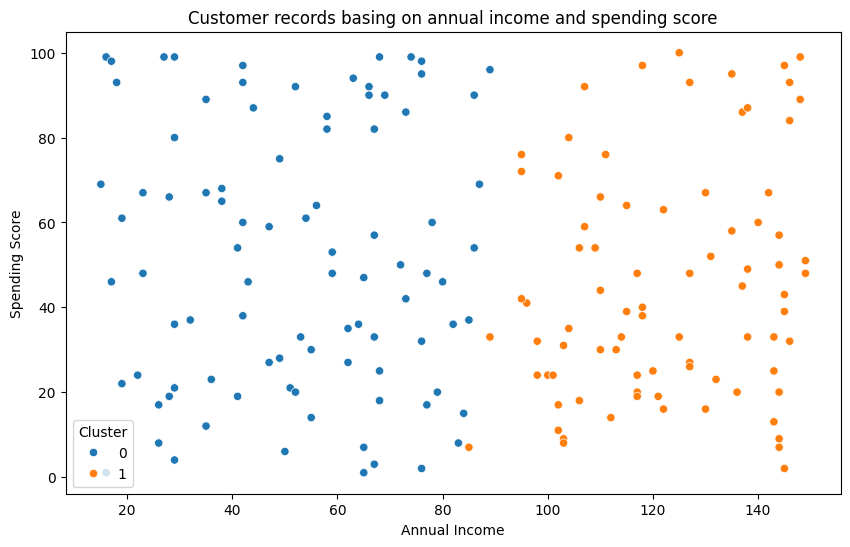

In [8]:
#visualise the cluster
pyt.figure(figsize=(10,6))
sb.scatterplot(customer_df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster')
pyt.title('Customer records basing on annual income and spending score')
pyt.xlabel('Annual Income')
pyt.ylabel('Spending Score')
pyt.show()

Text(0.5, 1.0, 'Customer records basing on annual income and spending score')

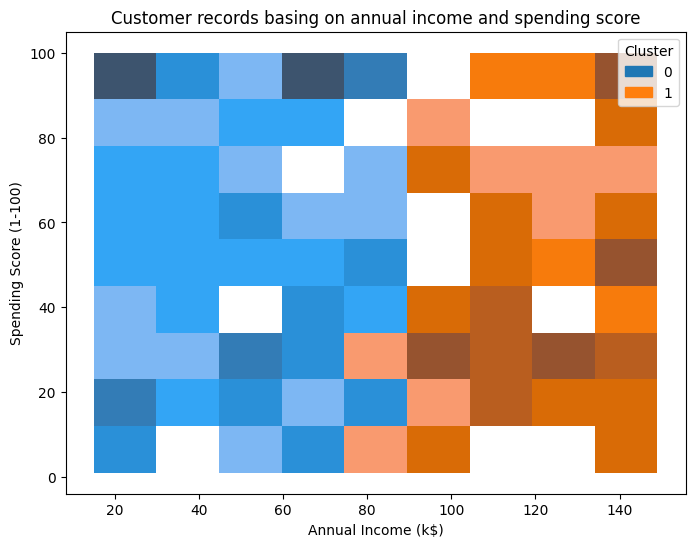

In [13]:
pyt.figure(figsize=(8,6))
sb.histplot(customer_df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster')
pyt.title('Customer records basing on annual income and spending score')

Text(70.72222222222221, 0.5, 'Clusters')

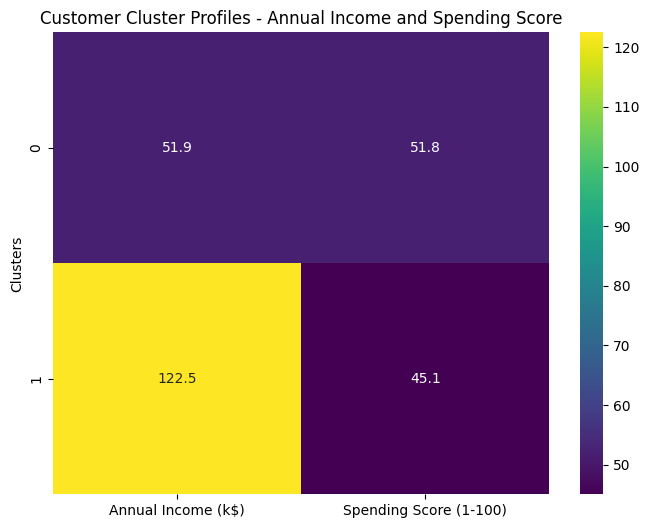

In [14]:
# Calculate cluster means
cluster_centroids = customer_df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()

pyt.figure(figsize=(8,6))
sb.heatmap(cluster_centroids, annot=True, cmap='viridis', fmt='.1f')
pyt.title('Customer Cluster Profiles - Annual Income and Spending Score')
pyt.ylabel('Clusters')